Shape: (503, 4)

Columns: ['ticker', 'sector', 'subsector', 'last_updated']

Sample of data:


,ticker,sector,subsector,last_updated
0,MMM,Industrials,Conglomerates,2025-06-02
1,AOS,Industrials,Specialty Industrial Machinery,2025-06-02
2,ABT,Healthcare,Medical Devices,2025-06-02
3,ABBV,Healthcare,Drug Manufacturers - General,2025-06-02
4,ACN,Technology,Information Technology Services,2025-06-02



Stocks per sector:


sector
Technology                82
Industrials               71
Financial Services        67
Healthcare                61
Consumer Cyclical         56
Consumer Defensive        36
Utilities                 31
Real Estate               31
Communication Services    23
Energy                    23
Basic Materials           20
Unknown                    2
Name: count, dtype: int64

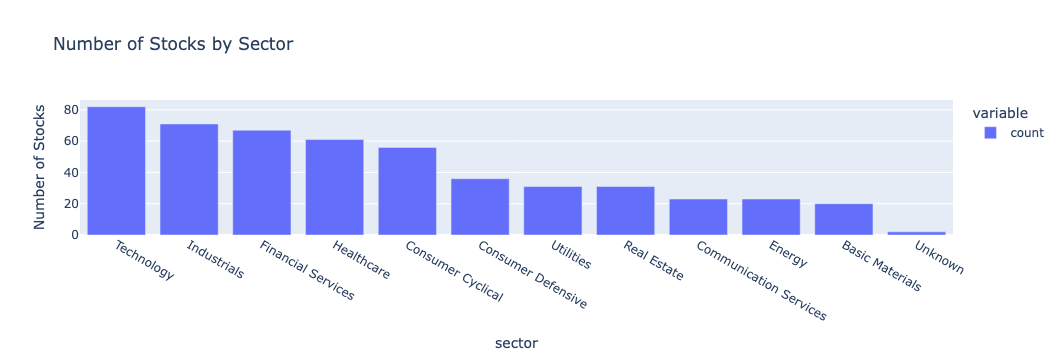


Tickers with unknown sectors: 2


,ticker,sector,subsector,last_updated
60,BRK-B,Unknown,Unknown,2025-06-02
74,BF-B,Unknown,Unknown,2025-06-02



Missing values per column:


ticker          0
sector          0
subsector       0
last_updated    0
dtype: int64


Number of unique subsectors: 114

Top 10 subsectors:


subsector
Utilities - Regulated Electric     23
Specialty Industrial Machinery     17
Software - Application             17
Semiconductors                     13
Software - Infrastructure          13
Asset Management                   12
Aerospace & Defense                12
Diagnostics & Research             11
Oil & Gas E&P                      11
Information Technology Services    11
Name: count, dtype: int64

In [1]:
import pandas as pd
import plotly.express as px

# Read the sector mapping
df = pd.read_parquet('market_features/metadata/sector_mapping.parquet')

# Basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSample of data:")
display(df.head())

# Count by sector
sector_counts = df['sector'].value_counts()
print("\nStocks per sector:")
display(sector_counts)

# Visualize sector distribution
fig = px.bar(
    sector_counts, 
    title='Number of Stocks by Sector',
    labels={'value': 'Number of Stocks', 'index': 'Sector'}
)
fig.show()

# Check for unknowns
unknown_sectors = df[df['sector'] == 'Unknown']
print("\nTickers with unknown sectors:", len(unknown_sectors))
if len(unknown_sectors) > 0:
    display(unknown_sectors)

# Check for missing data
print("\nMissing values per column:")
display(df.isnull().sum())

# Get unique subsectors
print("\nNumber of unique subsectors:", df['subsector'].nunique())
print("\nTop 10 subsectors:")
display(df['subsector'].value_counts().head(10))

In [2]:
import pandas as pd
import requests
from datetime import datetime, timedelta

def fetch_gdelt_data(start_date, end_date):
    base_url = "http://data.gdeltproject.org/events/"
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    sentiment_data = []

    for single_date in date_range:
        date_str = single_date.strftime("%Y%m%d")
        url = f"{base_url}{date_str}.export.CSV.zip"
        
        try:
            response = requests.get(url)
            if response.status_code == 200:
                df = pd.read_csv(url, compression='zip', sep='\t', header=None, low_memory=False)
                
                # Column indices for sentiment
                avgtone_index = 34
                
                avg_tone = df[avgtone_index].mean()
                sentiment_data.append({
                    "date": single_date,
                    "avg_tone": avg_tone
                })
            else:
                print(f"Data not found for {date_str}")
        except Exception as e:
            print(f"Error fetching data for {date_str}: {e}")

    return pd.DataFrame(sentiment_data)

# Define the date range
start_date = "2025-01-01"
end_date = "2025-02-03"

# Fetch the data
sentiment_df = fetch_gdelt_data(start_date, end_date)

# Display the resulting dataframe
print(sentiment_df.head())


        date  avg_tone
0 2025-01-01 -1.930671
1 2025-01-02 -2.037406
2 2025-01-03 -2.245253
3 2025-01-04 -2.257718
4 2025-01-05 -2.189166


In [233]:
import pandas as pd

In [234]:
# Load the Parquet file
df = pd.read_parquet("reports/TechnicalScorer.parquet")
df

,date,model,top_tickers,scores,report_md
0,2024-05-17,TechnicalScorer,"[BAX, CRL, GPN, LULU, ARE, AMP]","[4.5454545, 4.5454545, 4.5454545, 4.5454545, 3...",# Trading Advisor Report\n\nGenerated on: 2025...
1,2024-05-18,TechnicalScorer,[],[],# Trading Advisor Report\n\nGenerated on: 2025...
2,2024-05-19,TechnicalScorer,[],[],# Trading Advisor Report\n\nGenerated on: 2025...
3,2024-05-22,TechnicalScorer,"[JBHT, SLB, TGT, ULTA, BMY, BAX]","[6.363636, 6.363636, 6.363636, 6.363636, 5.454...",# Trading Advisor Report\n\nGenerated on: 2025...
4,2024-05-23,TechnicalScorer,"[ALGN, BMY, CZR, CLX, ITW, MCD]","[6.363636, 6.363636, 6.363636, 6.363636, 6.363...",# Trading Advisor Report\n\nGenerated on: 2025...
5,2025-05-23,TechnicalScorer,"[CPRT, KHC, AFL, ARE, AMCR, AVB, CRL, CPAY, FS...","[6.363636, 6.363636, 4.5454545, 4.5454545, 4.5...",# Trading Advisor Report\n\nGenerated on: 2025...
6,2025-05-29,TechnicalScorer,[],[],# Trading Advisor Report\n\nGenerated on: 2025...
7,2025-05-30,TechnicalScorer,[],[],# Trading Advisor Report\n\nGenerated on: 2025...
8,2025-05-31,TechnicalScorer,[],[],# Trading Advisor Report\n\nGenerated on: 2025...
9,2025-06-02,TechnicalScorer,[],[],# Trading Advisor Report\n\nGenerated on: 2025...


In [222]:
df.iloc[-1]

Open                                                      337.515015
High                                                      338.649994
Low                                                       333.209991
Close                                                     337.045013
Volume                                                      25402923
Dividends                                                        0.0
Stock Splits                                                     0.0
RSI                                                        63.058972
MACD                                                       19.993312
MACD_Signal                                                17.951582
MACD_Hist                                                    2.04173
BB_Upper                                                   368.68139
BB_Lower                                                  254.744116
BB_Middle                                                 311.712753
BB_Pband                          

In [219]:
import pandas as pd

# Load the Parquet file
df = pd.read_parquet("reports/TechnicalScorer.parquet")

print(len(df))
print(df.iloc[0].name)

500
0


# Trading Advisor Report

Generated on: 2025-05-23 16:23:11

## Current Positions

### CRL
**Technical Score:** 3.64/10
**OHLC:** Open: 134.21, High: 135.62, Low: 133.85, Close: 134.79
**Current Position**
**Technical Indicators:**
- RSI: 51.68
- MACD value: 2.77
- MACD signal: 2.03
- MACD histogram: 0.74
- BOLLINGER_BANDS upper: 153.53
- BOLLINGER_BANDS middle: 131.72
- BOLLINGER_BANDS lower: 109.92
- MOVING_AVERAGES sma_20: 131.72
**Analyst Targets:**
- Median: $159.28
- Range: $70.0 - $215.0

### CPAY
**Technical Score:** 2.73/10
**OHLC:** Open: 319.87, High: 323.46, Low: 321.35, Close: 322.78
**Current Position**
**Technical Indicators:**
- RSI: 43.45
- MACD value: 2.13
- MACD signal: 3.71
- MACD histogram: -1.58
- BOLLINGER_BANDS upper: 357.23
- BOLLINGER_BANDS middle: 333.69
- BOLLINGER_BANDS lower: 310.15
- MOVING_AVERAGES sma_20: 333.69
**Analyst Targets:**
- Median: $393.63
- Range: $330.0 - $445.0

### FSLR
**Technical Score:** 2.73/10
**OHLC:** Open: 154.0, High: 160.2, Low: 152.66, Close: 159.44
**Current Position**
**Technical Indicators:**
- RSI: 54.44
- MACD value: 8.79
- MACD signal: 8.99
- MACD histogram: -0.2
- BOLLINGER_BANDS upper: 196.69
- BOLLINGER_BANDS middle: 151.79
- BOLLINGER_BANDS lower: 106.89
- MOVING_AVERAGES sma_20: 151.79
**Analyst Targets:**
- Median: $200.05
- Range: $100.0 - $304.0

### REGN
**Technical Score:** 2.73/10
**OHLC:** Open: 586.85, High: 588.51, Low: 582.37, Close: 587.14
**Current Position**
**Technical Indicators:**
- RSI: 49.53
- MACD value: 0.33
- MACD signal: -4.21
- MACD histogram: 4.54
- BOLLINGER_BANDS upper: 627.57
- BOLLINGER_BANDS middle: 582.97
- BOLLINGER_BANDS lower: 538.36
- MOVING_AVERAGES sma_20: 582.97
**Analyst Targets:**
- Median: $797.21
- Range: $535.0 - $958.0

## New Technical Picks (Top 6) for 2025-05-23 (TechnicalScorer)

### CPRT
**Technical Score:** 6.36/10
**OHLC:** Open: 57.98, High: 58.07, Low: 54.44, Close: 54.53
**Technical Indicators:**
- RSI: 28.19
- MACD value: 0.18
- MACD signal: 0.92
- MACD histogram: -0.74
- BOLLINGER_BANDS upper: 64.9
- BOLLINGER_BANDS middle: 61.23
- BOLLINGER_BANDS lower: 57.56
- MOVING_AVERAGES sma_20: 61.23
**Analyst Targets:**
- Median: $61.51
- Range: $56.0 - $67.0

### KHC
**Technical Score:** 6.36/10
**OHLC:** Open: 26.48, High: 26.52, Low: 26.03, Close: 26.23
**Technical Indicators:**
- RSI: 29.7
- MACD value: -0.68
- MACD signal: -0.53
- MACD histogram: -0.14
- BOLLINGER_BANDS upper: 29.53
- BOLLINGER_BANDS middle: 27.95
- BOLLINGER_BANDS lower: 26.36
- MOVING_AVERAGES sma_20: 27.95
**Analyst Targets:**
- Median: $31.56
- Range: $26.0 - $53.34

### AFL
**Technical Score:** 4.55/10
**OHLC:** Open: 102.0, High: 102.48, Low: 101.73, Close: 101.84
**Technical Indicators:**
- RSI: 38.11
- MACD value: -0.85
- MACD signal: -0.54
- MACD histogram: -0.31
- BOLLINGER_BANDS upper: 108.53
- BOLLINGER_BANDS middle: 105.14
- BOLLINGER_BANDS lower: 101.75
- MOVING_AVERAGES sma_20: 105.14
**Analyst Targets:**
- Median: $106.0
- Range: $94.0 - $120.0

### ARE
**Technical Score:** 4.55/10
**OHLC:** Open: 67.8, High: 68.48, Low: 67.8, Close: 68.2
**Technical Indicators:**
- RSI: 32.39
- MACD value: -2.86
- MACD signal: -2.93
- MACD histogram: 0.07
- BOLLINGER_BANDS upper: 76.64
- BOLLINGER_BANDS middle: 72.43
- BOLLINGER_BANDS lower: 68.21
- MOVING_AVERAGES sma_20: 72.43
**Analyst Targets:**
- Median: $104.46
- Range: $76.0 - $144.0

### AMCR
**Technical Score:** 4.55/10
**OHLC:** Open: 8.95, High: 8.98, Low: 8.92, Close: 8.93
**Technical Indicators:**
- RSI: 39.01
- MACD value: -0.08
- MACD signal: -0.06
- MACD histogram: -0.02
- BOLLINGER_BANDS upper: 9.55
- BOLLINGER_BANDS middle: 9.24
- BOLLINGER_BANDS lower: 8.92
- MOVING_AVERAGES sma_20: 9.24
**Analyst Targets:**
- Median: $11.59
- Range: $10.83 - $13.0

### AVB
**Technical Score:** 4.55/10
**OHLC:** Open: 199.4, High: 199.41, Low: 197.69, Close: 198.42
**Technical Indicators:**
- RSI: 39.48
- MACD value: -1.08
- MACD signal: -0.25
- MACD histogram: -0.83
- BOLLINGER_BANDS upper: 213.46
- BOLLINGER_BANDS middle: 206.39
- BOLLINGER_BANDS lower: 199.31
- MOVING_AVERAGES sma_20: 206.39
**Analyst Targets:**
- Median: $234.0
- Range: $220.0 - $255.0


In [220]:
df

,date,ticker,score
0,2024-05-23 00:00:00,A,2.727273
1,2024-05-23 00:00:00,AAPL,2.727273
2,2024-05-23 00:00:00,ABBV,3.636364
3,2024-05-23 00:00:00,ABNB,2.727273
4,2024-05-23 00:00:00,ABT,0.000000
...,...,...,...
495,2024-05-23 00:00:00,XYL,2.727273
496,2024-05-23 00:00:00,YUM,0.909091
497,2024-05-23 00:00:00,ZBH,3.636364
498,2024-05-23 00:00:00,ZBRA,1.818182


In [264]:
import pandas as pd

# Load the Parquet file
df = pd.read_parquet("features/CB_features.parquet")

print(len(df))
print(df.iloc[-1])
#print(df[['Volume','Prev_Volume']].tail(20))

1256
Open                                                      294.730011
High                                                      299.098114
Low                                                       294.480011
Close                                                     298.856506
Volume                                                        840536
Volume_Prev                                                2483600.0
Dividends                                                        0.0
Stock Splits                                                     0.0
RSI                                                        62.022344
MACD                                                        2.106598
MACD_Signal                                                 1.252912
MACD_Hist                                                   0.853686
BB_Upper                                                  298.399978
BB_Lower                                                  282.393669
BB_Middle                    

In [209]:
df = pd.read_parquet("model_outputs/TechnicalScorer/AAPL.parquet")

In [265]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Volume_Prev', 'Dividends',
       'Stock Splits', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 'BB_Upper',
       'BB_Lower', 'BB_Middle', 'BB_Pband', 'SMA_20', 'SMA_50', 'SMA_100',
       'SMA_200', 'EMA_100', 'EMA_200', 'analyst_targets'],
      dtype='object')

Shape: (1256, 11)

Columns: ['pct_above_sma20', 'pct_above_sma50', 'pct_above_sma200', 'pct_oversold', 'pct_overbought', 'pct_macd_bullish', 'pct_macd_bearish', 'pct_volume_increasing', 'pct_above_bb_upper', 'pct_below_bb_lower', 'pct_bb_squeeze']

Date range: 2020-06-03 00:00:00 to 2025-06-02 00:00:00

Sample of data:


,pct_above_sma20,pct_above_sma50,pct_above_sma200,pct_oversold,pct_overbought,pct_macd_bullish,pct_macd_bearish,pct_volume_increasing,pct_above_bb_upper,pct_below_bb_lower,pct_bb_squeeze
Date,,,,,,,,,,,
2020-06-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2020-06-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.694501,0.0,0.0,0.0
2020-06-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.484725,0.0,0.0,0.0
2020-06-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.606925,0.0,0.0,0.0
2020-06-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.272912,0.0,0.0,0.0



Latest market breadth indicators:
pct_above_sma20: 51.69%
pct_above_sma50: 68.59%
pct_above_sma200: 50.30%
pct_oversold: 0.60%
pct_overbought: 4.57%
pct_macd_bullish: 3.78%
pct_macd_bearish: 2.98%
pct_volume_increasing: 0.60%
pct_above_bb_upper: 1.79%
pct_below_bb_lower: 2.78%
pct_bb_squeeze: 47.12%


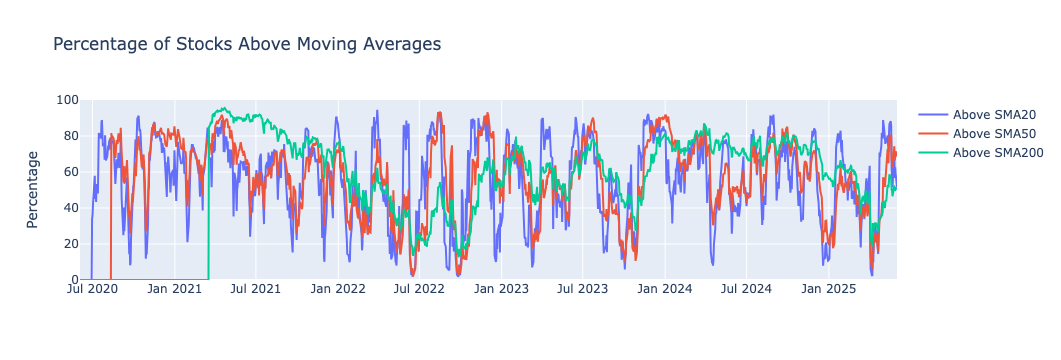

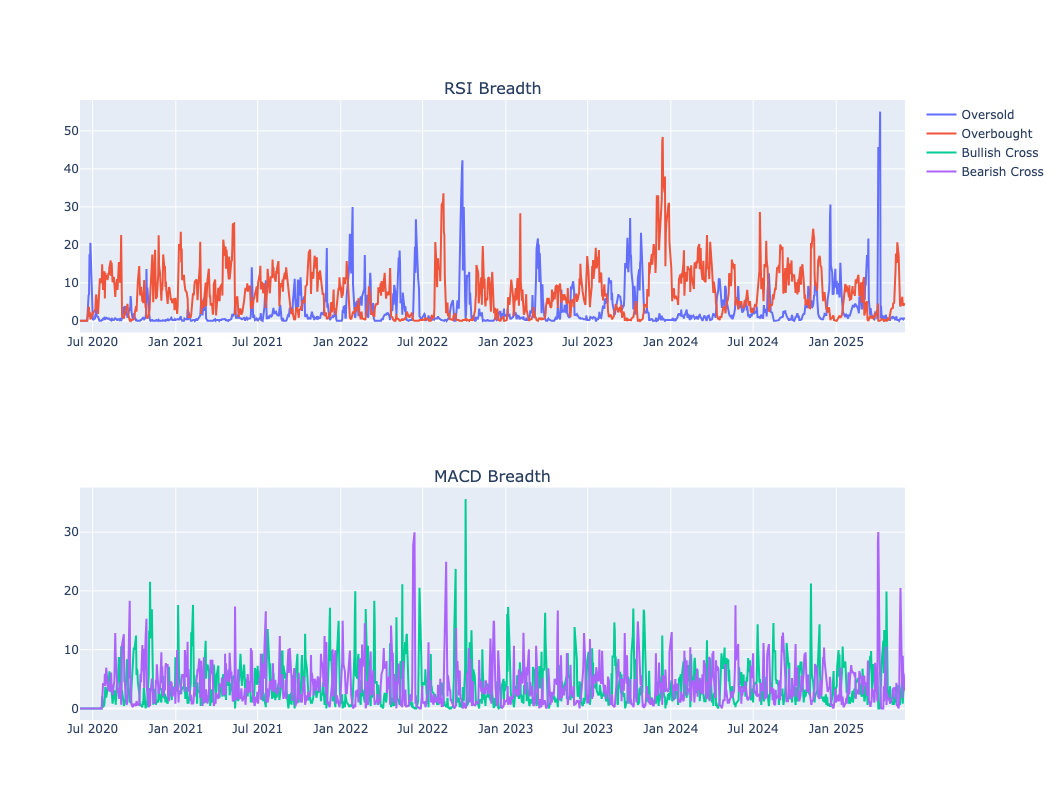

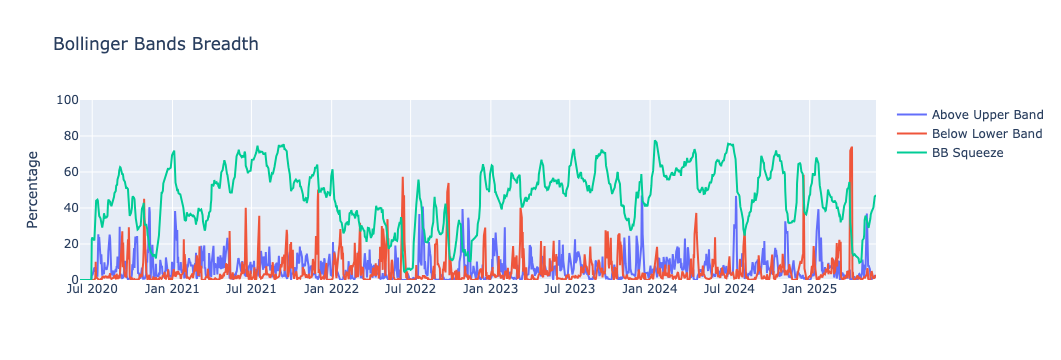

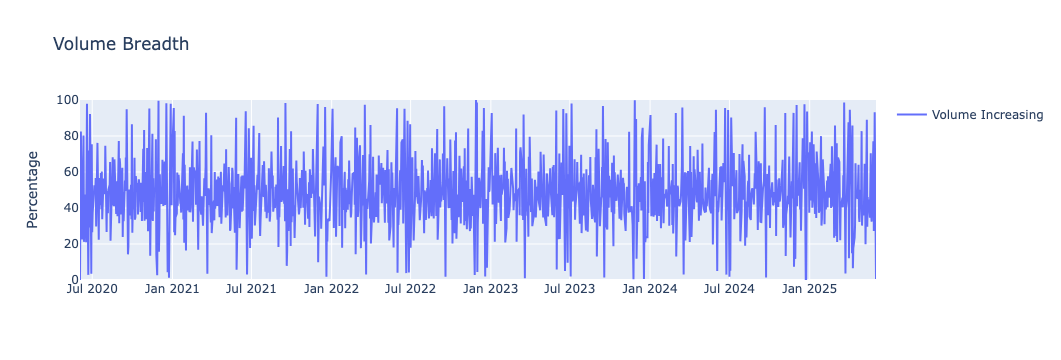

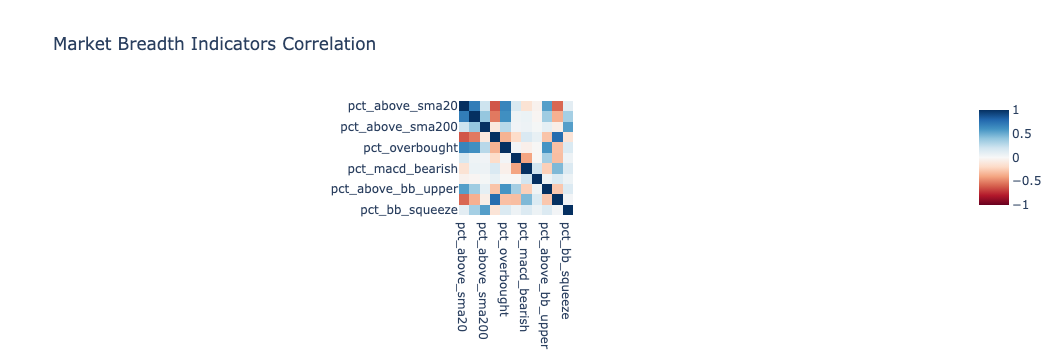

In [266]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Read the market breadth data
df = pd.read_parquet('market_features/breadth/daily_breadth.parquet')

# Basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nDate range:", df.index.min(), "to", df.index.max())
print("\nSample of data:")
display(df.head())

# Create a summary of the latest values
latest = df.iloc[-1]
print("\nLatest market breadth indicators:")
for col in df.columns:
    print(f"{col}: {latest[col]:.2f}%")

# Plot moving average breadth
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['pct_above_sma20'], name='Above SMA20'))
fig.add_trace(go.Scatter(x=df.index, y=df['pct_above_sma50'], name='Above SMA50'))
fig.add_trace(go.Scatter(x=df.index, y=df['pct_above_sma200'], name='Above SMA200'))
fig.update_layout(
    title='Percentage of Stocks Above Moving Averages',
    yaxis_title='Percentage',
    yaxis_range=[0, 100],
    showlegend=True
)
fig.show()

# Plot RSI and MACD breadth
fig = make_subplots(rows=2, cols=1, subplot_titles=('RSI Breadth', 'MACD Breadth'))
fig.add_trace(go.Scatter(x=df.index, y=df['pct_oversold'], name='Oversold'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['pct_overbought'], name='Overbought'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['pct_macd_bullish'], name='Bullish Cross'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['pct_macd_bearish'], name='Bearish Cross'), row=2, col=1)
fig.update_layout(height=800, showlegend=True)
fig.show()

# Plot Bollinger Bands breadth
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['pct_above_bb_upper'], name='Above Upper Band'))
fig.add_trace(go.Scatter(x=df.index, y=df['pct_below_bb_lower'], name='Below Lower Band'))
fig.add_trace(go.Scatter(x=df.index, y=df['pct_bb_squeeze'], name='BB Squeeze'))
fig.update_layout(
    title='Bollinger Bands Breadth',
    yaxis_title='Percentage',
    yaxis_range=[0, 100],
    showlegend=True
)
fig.show()

# Plot volume breadth
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['pct_volume_increasing'], name='Volume Increasing'))
fig.update_layout(
    title='Volume Breadth',
    yaxis_title='Percentage',
    yaxis_range=[0, 100],
    showlegend=True
)
fig.show()

# Correlation heatmap
corr = df.corr()
fig = px.imshow(
    corr,
    title='Market Breadth Indicators Correlation',
    color_continuous_scale='RdBu',
    zmin=-1,
    zmax=1
)
fig.show()

In [267]:
import pandas as pd

# Load sector mapping
sector_map = pd.read_parquet('market_features/metadata/sector_mapping.parquet')
print("Sector mapping sample:")
display(sector_map.head())

# List of tickers in mapping
mapping_tickers = set(sector_map['ticker'])

# List of tickers in features dir
import os
feature_tickers = set(f.split('_features')[0] for f in os.listdir('features') if f.endswith('_features.parquet'))

# Tickers in mapping but not in features
print("Tickers in mapping but not in features:", mapping_tickers - feature_tickers)
print("Tickers in features but not in mapping:", feature_tickers - mapping_tickers)

Sector mapping sample:


,ticker,sector,subsector,last_updated
0,MMM,Industrials,Conglomerates,2025-06-02
1,AOS,Industrials,Specialty Industrial Machinery,2025-06-02
2,ABT,Healthcare,Medical Devices,2025-06-02
3,ABBV,Healthcare,Drug Manufacturers - General,2025-06-02
4,ACN,Technology,Information Technology Services,2025-06-02


Tickers in mapping but not in features: {'BRK.B', 'BF.B'}
Tickers in features but not in mapping: {'BF-B', 'BRK-B'}


In [268]:
import pandas as pd
from trading_advisor.data import normalize_ticker

df = pd.read_parquet('market_features/metadata/sector_mapping.parquet')
df['ticker'] = df['ticker'].apply(normalize_ticker)
df.to_parquet('market_features/metadata/sector_mapping.parquet')
print("Normalized sector mapping tickers!")

Normalized sector mapping tickers!


In [3]:
import pandas as pd

# Load the sector performance data
df = pd.read_parquet('market_features/sectors/sector_performance.parquet')

# Show basic info
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Date range:", df.index.min(), "to", df.index.max())

# Show the first few rows
print("\nFirst 5 rows:")
print(df.head())

# Show the last few rows
print("\nLast 5 rows:")
print(df.tail())

# Show columns grouped by sector (optional)
sectors = sorted(set(col.split('_')[0] for col in df.columns))
print("\nSectors found:", sectors)

Shape: (1256, 120)
Columns: ['Industrials_return_1d', 'Industrials_return_5d', 'Industrials_return_20d', 'Industrials_volume_change', 'Industrials_relative_volume', 'Industrials_avg_rsi', 'Industrials_avg_macd_hist', 'Industrials_avg_bb_position', 'Industrials_momentum', 'Healthcare_return_1d', 'Healthcare_return_5d', 'Healthcare_return_20d', 'Healthcare_volume_change', 'Healthcare_relative_volume', 'Healthcare_avg_rsi', 'Healthcare_avg_macd_hist', 'Healthcare_avg_bb_position', 'Healthcare_momentum', 'Technology_return_1d', 'Technology_return_5d', 'Technology_return_20d', 'Technology_volume_change', 'Technology_relative_volume', 'Technology_avg_rsi', 'Technology_avg_macd_hist', 'Technology_avg_bb_position', 'Technology_momentum', 'Utilities_return_1d', 'Utilities_return_5d', 'Utilities_return_20d', 'Utilities_volume_change', 'Utilities_relative_volume', 'Utilities_avg_rsi', 'Utilities_avg_macd_hist', 'Utilities_avg_bb_position', 'Utilities_momentum', 'Financial Services_return_1d', 'Fi

In [4]:
print('Sector Performance Data:')

Sector Performance Data:


In [271]:
display(sector_performance.head())"]}],"metadata":{"kernelspec":{"display_name":"Python 3","language":"python","name":"python3"}

SyntaxError: invalid syntax (3408570651.py, line 1)